In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading and Transforming the Data 

In [2]:
raw_juan=pd.read_excel('Registro_Contable_Juan.xlsx', 'Registro Contable')
raw_maria=pd.read_excel('Registro_Contable_Maria.xlsx', 'Registro Contable')

In [3]:
juan = raw_juan.copy()
maria = raw_maria.copy()

In [4]:
juan

,Fecha,Cuenta,Categoría,Subcategorías,Nota,USD,Ingreso/Gasto,Nota.1,Importe,Moneda,Cuenta.1
0,2020-10-14,Cuentas,Iglesia,NaN,Diezmo,5920.00,Gasto,NaN,5920.00,USD,5920.00
1,2020-10-14,Cuentas,Regalos,NaN,Regalos de cumpleaños,400.00,Gasto,NaN,400.00,USD,400.00
2,2020-10-10,Efectivo,Comida,Comidas fuera,NaN,1100.00,Gasto,NaN,1100.00,USD,1100.00
3,2020-10-05,Cuentas,Ahorros,NaN,$84 en Skrill,12000.00,Gasto,NaN,12000.00,USD,12000.00
4,2020-10-05,Cuentas,Otros,TDC,Tarjeta de crédito,11742.00,Gasto,NaN,11742.00,USD,11742.00
...,...,...,...,...,...,...,...,...,...,...,...
505,2019-07-31,Efectivo,Gastos propios,NaN,recarga celular,300.00,Gasto,NaN,300.00,USD,300.00
506,2019-07-31,Efectivo,Mantenimiento del hogar,NaN,servicios básicos,2070.00,Gasto,NaN,2070.00,USD,2070.00
507,2019-07-31,Efectivo,Comida,NaN,queso,220.62,Gasto,NaN,220.62,USD,220.62
508,2019-07-31,Efectivo,Comida,NaN,NaN,400.00,Gasto,NaN,400.00,USD,400.00


In [5]:
maria

,Fecha,Cuenta,Categoría,Subcategorías,Nota,ARS,Ingreso/Gasto,Nota.1,Importe,Moneda,Cuenta.1
0,2020-09-30,Cuentas,Mantenimiento del hogar,Servicios públicos,NaN,1501.0,Gasto,NaN,1501.0,ARS,1501.0
1,2020-09-29,Efectivo,Dinero extra,NaN,reintegros viaticos,1630.0,Ingreso,NaN,1630.0,ARS,1630.0
2,2020-09-28,Efectivo,Mantenimiento del hogar,Dispositivos,servicio domicilio Servigad,400.0,Gasto,NaN,400.0,ARS,400.0
3,2020-09-27,Efectivo,Comida,Comida,NaN,711.0,Gasto,NaN,711.0,ARS,711.0
4,2020-09-23,Efectivo,Mantenimiento del hogar,Dispositivos,servicio domicilio Servigad,400.0,Gasto,NaN,400.0,ARS,400.0
...,...,...,...,...,...,...,...,...,...,...,...
741,2018-10-05,Efectivo,Transporte,NaN,NaN,100.0,Gasto,NaN,100.0,ARS,100.0
742,2018-10-05,Efectivo,Gastos propios,NaN,NaN,130.0,Gasto,almuerzo en la calle,130.0,ARS,130.0
743,2018-10-03,Cuentas,Mantenimiento del hogar,NaN,NaN,9000.0,Gasto,alquiler,9000.0,ARS,9000.0
744,2018-10-03,Cuentas,Otros,NaN,NaN,206.0,Gasto,cuota.mant.cuenta,206.0,ARS,206.0


In [6]:
# We can see the Maria's Record is larger than Juan's Record, but we are interested in analyze only the months when both
# have records,so we are selecting the records from 01-08-2019 to 30-09-2020
maria = maria[maria['Fecha']>'2019-07-31']
maria

,Fecha,Cuenta,Categoría,Subcategorías,Nota,ARS,Ingreso/Gasto,Nota.1,Importe,Moneda,Cuenta.1
0,2020-09-30,Cuentas,Mantenimiento del hogar,Servicios públicos,NaN,1501.0,Gasto,NaN,1501.0,ARS,1501.0
1,2020-09-29,Efectivo,Dinero extra,NaN,reintegros viaticos,1630.0,Ingreso,NaN,1630.0,ARS,1630.0
2,2020-09-28,Efectivo,Mantenimiento del hogar,Dispositivos,servicio domicilio Servigad,400.0,Gasto,NaN,400.0,ARS,400.0
3,2020-09-27,Efectivo,Comida,Comida,NaN,711.0,Gasto,NaN,711.0,ARS,711.0
4,2020-09-23,Efectivo,Mantenimiento del hogar,Dispositivos,servicio domicilio Servigad,400.0,Gasto,NaN,400.0,ARS,400.0
...,...,...,...,...,...,...,...,...,...,...,...
363,2019-08-03,Efectivo,Gastos propios,NaN,transporte cama,1000.0,Gasto,NaN,1000.0,ARS,1000.0
364,2019-08-02,Efectivo,Gastos propios,NaN,cambio a bs tasa 247,2000.0,Gasto,NaN,2000.0,ARS,2000.0
365,2019-08-02,Efectivo,Productos de belleza,Higiene personal,anticonceptivo,987.0,Gasto,NaN,987.0,ARS,987.0
366,2019-08-02,Efectivo,Salario,NaN,NaN,25419.0,Ingreso,NaN,25419.0,ARS,25419.0


In [7]:
juan = juan[juan['Fecha']<'2020-09-30']
juan = juan[juan['Fecha']>'2019-07-31']
juan

,Fecha,Cuenta,Categoría,Subcategorías,Nota,USD,Ingreso/Gasto,Nota.1,Importe,Moneda,Cuenta.1
7,2020-09-28,Cuentas,Comida,Comida,mercado,1545.00,Gasto,NaN,1545.00,USD,1545.00
8,2020-09-28,Cuentas,Comida,Comida,queso,843.30,Gasto,NaN,843.30,USD,843.30
9,2020-09-22,Cuentas,Regalos,NaN,Regalos de cumpleaños,200.00,Gasto,NaN,200.00,USD,200.00
10,2020-09-11,Cuentas,Iglesia,NaN,Diezmo,5920.00,Gasto,NaN,5920.00,USD,5920.00
11,2020-09-05,Cuentas,Mantenimiento del hogar,Alquiler,alquiler,16070.00,Gasto,NaN,16070.00,USD,16070.00
...,...,...,...,...,...,...,...,...,...,...,...
500,2019-08-05,Efectivo,Gastos propios,NaN,NaN,40.00,Gasto,NaN,40.00,USD,40.00
501,2019-08-03,Efectivo,Transporte,Taxi,Uber,130.00,Gasto,NaN,130.00,USD,130.00
502,2019-08-03,Efectivo,Comida,Comida,mercado,3355.95,Gasto,NaN,3355.95,USD,3355.95
503,2019-08-02,Efectivo,Comida,Comida,pan,100.00,Gasto,NaN,100.00,USD,100.00


## Data Preprocessing

In [8]:
#Renaming columns
juan.rename(columns={'USD':'Importe (ARS)'}, inplace=True)
maria.rename(columns={'ARS':'Importe (ARS)'}, inplace=True)

C:\Users\john3\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
#Dropping unnecessary columns
juan.drop(['Nota', 'Cuenta.1', 'Importe', 'Moneda', 'Nota.1'], axis=1, inplace=True)
maria.drop(['Nota', 'Cuenta.1', 'Importe', 'Moneda', 'Nota.1'], axis=1, inplace=True)

C:\Users\john3\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
juan.head()

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto
7,2020-09-28,Cuentas,Comida,Comida,1545.0,Gasto
8,2020-09-28,Cuentas,Comida,Comida,843.3,Gasto
9,2020-09-22,Cuentas,Regalos,NaN,200.0,Gasto
10,2020-09-11,Cuentas,Iglesia,NaN,5920.0,Gasto
11,2020-09-05,Cuentas,Mantenimiento del hogar,Alquiler,16070.0,Gasto


In [11]:
# Adding a new column with the subject name
juan['Name']= 'Juan'
maria['Name']= 'Maria'

<ipython-input-11-f3b6338a3c32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maria['Name']= 'Maria'


### Merging Both Datasets

In [12]:
record=pd.concat([maria,juan],ignore_index=True)

In [13]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          866 non-null    datetime64[ns]
 1   Cuenta         866 non-null    object        
 2   Categoría      863 non-null    object        
 3   Subcategorías  669 non-null    object        
 4   Importe (ARS)  866 non-null    float64       
 5   Ingreso/Gasto  866 non-null    object        
 6   Name           866 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 47.5+ KB


In [14]:
# Looking for inconsistencies
record['Categoría'].unique()

array(['Mantenimiento del hogar', 'Dinero extra', 'Comida',
       'Gastos propios', 'Ahorro', 'Productos de belleza', 'Otros',
       'Salario', 'Plus', 'Otro', 'Transporte', 'Salud',
       'Entretenimiento', 'Ropa', 'Regalos', 'Educación', 'Iglesia',
       'Ahorros', 'Dinero mensual', 'Ajuste por diferencia', nan,
       'Modificar saldo'], dtype=object)

In [15]:
record['Subcategorías'].unique()

array(['Servicios públicos', nan, 'Dispositivos', 'Comida',
       'Comidas fuera', 'Muebles', 'Chucherias', 'Higiene personal',
       'Expensas', 'TDC', 'Alquiler', 'Taxi', 'Salud', 'Autobús',
       'Medicina', 'Juegos', 'Moda', 'salidas', 'Cena', 'Zapatos', 'Ropa',
       'Peluquería', 'Accesorios', 'Cocina', 'Productos cosméticos',
       'Estudios', 'Eventos', 'Servicios', 'Chucherías', 'Sube',
       'Bebidas', 'Paseos', 'Gimnasio', 'Otros'], dtype=object)

In [16]:
#Fixing inconsistencies
record['Categoría'].replace({'Ahorro':'Ahorros','Otro':'Otros', 'Dinero mensual': 'Salario'}, inplace=True)
# The subcategory Cena is missclasified, it need to be part of Comidas Afuera, the same for Autobús that need to be part
# of Sube and Servicios Públicos need to be part of Servicios
record['Subcategorías'].replace({'Cena':'Comidas fuera', 'Autobús':'Sube', 
                                   'Servicios públicos':'Servicios', 'Chucherias':'Chucherías'}, inplace=True)

In [17]:
record.Categoría.unique()

array(['Mantenimiento del hogar', 'Dinero extra', 'Comida',
       'Gastos propios', 'Ahorros', 'Productos de belleza', 'Otros',
       'Salario', 'Plus', 'Transporte', 'Salud', 'Entretenimiento',
       'Ropa', 'Regalos', 'Educación', 'Iglesia', 'Ajuste por diferencia',
       nan, 'Modificar saldo'], dtype=object)

In [18]:
record.Subcategorías.unique()

array(['Servicios', nan, 'Dispositivos', 'Comida', 'Comidas fuera',
       'Muebles', 'Chucherías', 'Higiene personal', 'Expensas', 'TDC',
       'Alquiler', 'Taxi', 'Salud', 'Sube', 'Medicina', 'Juegos', 'Moda',
       'salidas', 'Zapatos', 'Ropa', 'Peluquería', 'Accesorios', 'Cocina',
       'Productos cosméticos', 'Estudios', 'Eventos', 'Bebidas', 'Paseos',
       'Gimnasio', 'Otros'], dtype=object)

In [19]:
#The categories Ajuste por Diferencia and Modificar saldo doesn't represent expenses and would only distort our analysis
# so we area going to delete them
record = record[record['Categoría']!='Ajuste por diferencia']
record = record[record['Categoría']!='Modificar saldo']
record

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto,Name
0,2020-09-30,Cuentas,Mantenimiento del hogar,Servicios,1501.00,Gasto,Maria
1,2020-09-29,Efectivo,Dinero extra,NaN,1630.00,Ingreso,Maria
2,2020-09-28,Efectivo,Mantenimiento del hogar,Dispositivos,400.00,Gasto,Maria
3,2020-09-27,Efectivo,Comida,Comida,711.00,Gasto,Maria
4,2020-09-23,Efectivo,Mantenimiento del hogar,Dispositivos,400.00,Gasto,Maria
...,...,...,...,...,...,...,...
861,2019-08-05,Efectivo,Gastos propios,NaN,40.00,Gasto,Juan
862,2019-08-03,Efectivo,Transporte,Taxi,130.00,Gasto,Juan
863,2019-08-03,Efectivo,Comida,Comida,3355.95,Gasto,Juan
864,2019-08-02,Efectivo,Comida,Comida,100.00,Gasto,Juan


### Missing Values

In [20]:
pd.isnull(record).sum()

Fecha              0
Cuenta             0
Categoría          3
Subcategorías    189
Importe (ARS)      0
Ingreso/Gasto      0
Name               0
dtype: int64

In [21]:
record[record['Categoría'].isnull()]

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto,Name
398,2020-07-06,Cuentas,NaN,NaN,4345.03,Dinero gastado,Juan
399,2020-07-06,Cuentas,NaN,NaN,9894.30,Dinero gastado,Juan
437,2020-06-01,Cuentas,NaN,NaN,4172.91,Dinero gastado,Juan


In [22]:
record[record['Ingreso/Gasto']=='Dinero gastado']

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto,Name
398,2020-07-06,Cuentas,NaN,NaN,4345.03,Dinero gastado,Juan
399,2020-07-06,Cuentas,NaN,NaN,9894.30,Dinero gastado,Juan
437,2020-06-01,Cuentas,NaN,NaN,4172.91,Dinero gastado,Juan


In [23]:
# Deleting values with no category
# Since the values with no category are the same as the ones with the text "Dinero gastado" in the column Ingreso/Gasto,
# we are going to use this column to delete them
record = record[record['Ingreso/Gasto']!='Dinero gastado']

In [24]:
# Replacing missing values in Subcategorías with the values of Categoría
record['Subcategorías'].replace(np.nan, record['Categoría'], inplace=True)
pd.isnull(record).sum()

C:\Users\john3\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Fecha            0
Cuenta           0
Categoría        0
Subcategorías    0
Importe (ARS)    0
Ingreso/Gasto    0
Name             0
dtype: int64

### Exporting the data

In [25]:
#record.to_excel('Record.xlsx')

### Analyzing the Data

In [26]:
record.head()

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto,Name
0,2020-09-30,Cuentas,Mantenimiento del hogar,Servicios,1501.0,Gasto,Maria
1,2020-09-29,Efectivo,Dinero extra,Dinero extra,1630.0,Ingreso,Maria
2,2020-09-28,Efectivo,Mantenimiento del hogar,Dispositivos,400.0,Gasto,Maria
3,2020-09-27,Efectivo,Comida,Comida,711.0,Gasto,Maria
4,2020-09-23,Efectivo,Mantenimiento del hogar,Dispositivos,400.0,Gasto,Maria


In [27]:
#Splitting the Data into Income and expenses
Income = record[record['Ingreso/Gasto']=='Ingreso']
Expenses = record[record['Ingreso/Gasto']=='Gasto']

In [28]:
Expenses

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto,Name
0,2020-09-30,Cuentas,Mantenimiento del hogar,Servicios,1501.00,Gasto,Maria
2,2020-09-28,Efectivo,Mantenimiento del hogar,Dispositivos,400.00,Gasto,Maria
3,2020-09-27,Efectivo,Comida,Comida,711.00,Gasto,Maria
4,2020-09-23,Efectivo,Mantenimiento del hogar,Dispositivos,400.00,Gasto,Maria
5,2020-09-21,Cuentas,Comida,Comida,1459.00,Gasto,Maria
...,...,...,...,...,...,...,...
861,2019-08-05,Efectivo,Gastos propios,Gastos propios,40.00,Gasto,Juan
862,2019-08-03,Efectivo,Transporte,Taxi,130.00,Gasto,Juan
863,2019-08-03,Efectivo,Comida,Comida,3355.95,Gasto,Juan
864,2019-08-02,Efectivo,Comida,Comida,100.00,Gasto,Juan


### Analyzing Income

#### Extracting the year and month from the date

In [29]:
def date_to_month(date_value):
    return date_value.month

def date_to_year(date_value):
    return date_value.year

In [30]:
#Adding year and month to the DataFrame
Income1 = Income.copy()
Income1['Year']= Income1['Fecha'].apply(date_to_year)
Income1['Month']= Income1['Fecha'].apply(date_to_month)
Income1.head()

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto,Name,Year,Month
1,2020-09-29,Efectivo,Dinero extra,Dinero extra,1630.00,Ingreso,Maria,2020,9
25,2020-09-02,Cuentas,Salario,Salario,63212.00,Ingreso,Maria,2020,9
37,2020-08-05,Cuentas,Plus,Plus,6524.33,Ingreso,Maria,2020,8
43,2020-08-03,Cuentas,Salario,Salario,60657.00,Ingreso,Maria,2020,8
45,2020-08-01,Cuentas,Otros,Otros,3144.00,Ingreso,Maria,2020,8


#### Grouping the data 

In [31]:
pivot_Income = Income1.pivot_table(['Importe (ARS)'], index=['Year','Month'], 
                                   columns= ['Categoría'], aggfunc=sum, fill_value=0)
pivot_Income

Importe (ARS)                               
Categoría   Dinero extra     Otros      Plus    Salario
Year Month                                             
2019 8             10600      0.00      0.00   25419.00
     9              2000      0.00    678.00   64863.00
     10             5000     16.99      0.00   64863.00
     11            11350    170.00      0.00   62896.00
     12            21006      0.00  13000.00   67528.62
2020 1              3200   1194.00      0.00   66607.00
     2             24183      0.00      0.00   71587.00
     3              9061      0.00      0.00   99783.00
     4             37600      0.00      0.00   92548.00
     5                 0  17381.00      0.00   99407.00
     6             23409  27805.00      0.00   99783.00
     7              2330   8462.00      0.00   99258.00
     8                 0   3144.00   6524.33  105964.00
     9              1630      0.00      0.00  122401.00

In [32]:
pivot_Income.describe()

Importe (ARS)                                           
Categoría  Dinero extra         Otros          Plus        Salario
count         14.000000     14.000000     14.000000      14.000000
mean       10812.071429   4155.213571   1443.023571   81636.258571
std        11508.553297   8396.157515   3750.632024   25203.412856
min            0.000000      0.000000      0.000000   25419.000000
25%         2082.500000      0.000000      0.000000   65299.000000
50%         7030.500000      8.495000      0.000000   82067.500000
75%        18592.000000   2656.500000      0.000000   99689.000000
max        37600.000000  27805.000000  13000.000000  122401.000000

Text(0.5, 1.0, 'Income')

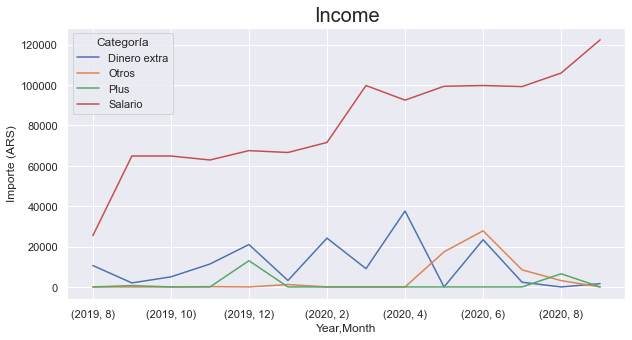

In [33]:
pivot_Income['Importe (ARS)'].plot(figsize=(10,5))
plt.ylabel('Importe (ARS)')
plt.title('Income', size=20)

In [34]:
#Now we are grouping the data by subject too
pivot_Income_subject = Income1.pivot_table(['Importe (ARS)'], index=['Year','Month'], 
                                   columns= ['Name','Categoría'], aggfunc=sum, fill_value=0)
pivot_Income_subject

Importe (ARS)                                                 \
Name                Juan                         Maria                    
Categoría   Dinero extra  Otros   Salario Dinero extra  Otros      Plus   
Year Month                                                                
2019 8              7600   0.00      0.00         3000      0      0.00   
     9                 0   0.00  39444.00         2000      0    678.00   
     10             3000  16.99  39444.00         2000      0      0.00   
     11             6350   0.00  37477.00         5000    170      0.00   
     12            21006   0.00  42109.62            0      0  13000.00   
2020 1              3200   0.00  41188.00            0   1194      0.00   
     2                 0   0.00  43678.00        24183      0      0.00   
     3              9061   0.00  45307.00            0      0      0.00   
     4                 0   0.00  37756.00        37600      0      0.00   
     5                 0   0.00  45307.00            0  17381      0.00   
     6             23409   0.00  45307.00            0  27805      0.00   
     7                 0   0.00  45307.00         2330   8462      0.00   
     8                 0   0.00  45307.00            0   3144   6524.33   
     9                 0   0.00  59189.00         1630      0      0.00   

                    
Name                
Categoría  Salario  
Year Month          
2019 8       25419  
     9       25419  
     10      25419  
     11      25419  
     12      25419  
2020 1       25419  
     2       27909  
     3       54476  
     4       54792  
     5       54100  
     6       54476  
     7       53951  
     8       60657  
     9       63212

In [35]:
pivot_Income_subject.describe()

Importe (ARS)                                                       \
Name               Juan                                  Maria                 
Categoría  Dinero extra      Otros       Salario  Dinero extra         Otros   
count         14.000000  14.000000     14.000000     14.000000     14.000000   
mean        5259.000000   1.213571  40487.187143   5553.071429   4154.000000   
std         7851.792564   4.540769  12821.631089  11152.615619   8396.802862   
min            0.000000   0.000000      0.000000      0.000000      0.000000   
25%            0.000000   0.000000  39444.000000      0.000000      0.000000   
50%         1500.000000   0.000000  42893.810000   1815.000000      0.000000   
75%         7287.500000   0.000000  45307.000000   2832.500000   2656.500000   
max        23409.000000  16.990000  59189.000000  37600.000000  27805.000000   

                                       
Name                                   
Categoría          Plus       Salario  
count         14.000000     14.000000  
mean        1443.023571  41149.071429  
std         3750.632024  16172.631071  
min            0.000000  25419.000000  
25%            0.000000  25419.000000  
50%            0.000000  40930.000000  
75%            0.000000  54476.000000  
max        13000.000000  63212.000000

#### We can see the mean salary for both subjects are similar, with a difference around ARS 1100, the standard deviation of extra income is higher for Maria than for Juan. The maximun value for salary is higher in Maria, this shows that she is earing more money now than Juan, but since the mean Salary is similar this means that Juan used to have a higher salary.

Text(0.5, 1.0, "Juan's Income")

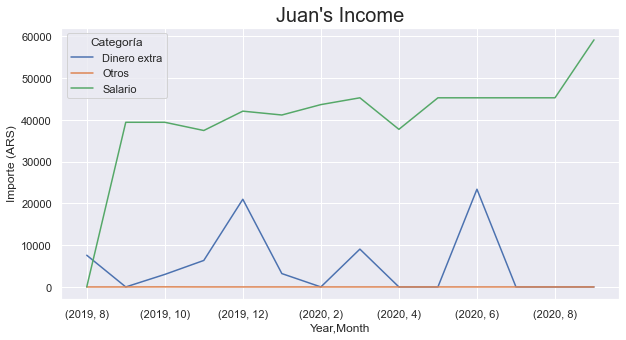

In [36]:
pivot_Income_subject['Importe (ARS)','Juan'].plot(figsize=(10,5))
plt.ylabel('Importe (ARS)')
plt.title('Juan\'s Income', size=20)

Text(0.5, 1.0, "Maria's Income")

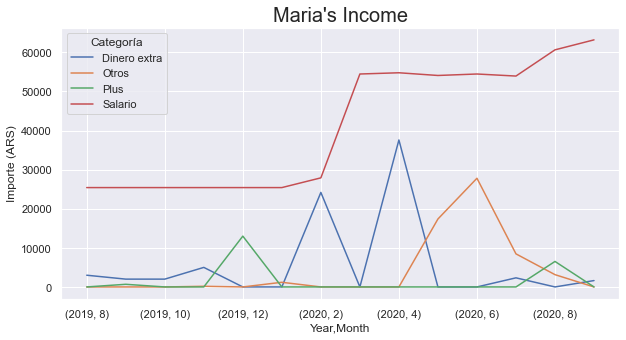

In [37]:
pivot_Income_subject['Importe (ARS)','Maria'].plot(figsize=(10,5))
plt.ylabel('Importe (ARS)')
plt.title('Maria\'s Income', size=20)

#### For the graphs show above we can see that most of the extra income belongs to Maria, and unlike Juan's extra income, this represent an important part.

Text(0.5, 1.0, 'Income by Subject')

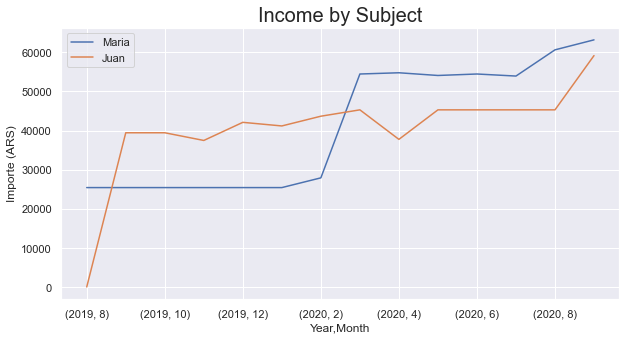

In [38]:
pivot_Income_subject['Importe (ARS)','Maria', 'Salario'].plot(figsize=(10,5), label='Maria' )
pivot_Income_subject['Importe (ARS)','Juan', 'Salario'].plot(figsize=(10,5), label = 'Juan')
plt.ylabel('Importe (ARS)')
plt.legend()
plt.title('Income by Subject', size=20)

#### Here we can see how the gap between salaries changes over time, this is due to increase in the salaries and promotions that have been at different times.

### Analyzing Expenses

In [39]:
#Adding year and month to the DataFrame
Expenses1 = Expenses.copy()
Expenses1['Year']= Expenses1['Fecha'].apply(date_to_year)
Expenses1['Month']= Expenses1['Fecha'].apply(date_to_month)
Expenses1.head()

,Fecha,Cuenta,Categoría,Subcategorías,Importe (ARS),Ingreso/Gasto,Name,Year,Month
0,2020-09-30,Cuentas,Mantenimiento del hogar,Servicios,1501.0,Gasto,Maria,2020,9
2,2020-09-28,Efectivo,Mantenimiento del hogar,Dispositivos,400.0,Gasto,Maria,2020,9
3,2020-09-27,Efectivo,Comida,Comida,711.0,Gasto,Maria,2020,9
4,2020-09-23,Efectivo,Mantenimiento del hogar,Dispositivos,400.0,Gasto,Maria,2020,9
5,2020-09-21,Cuentas,Comida,Comida,1459.0,Gasto,Maria,2020,9


#### Grouping the Data

In [40]:
pivot_Expenses = Expenses1.pivot_table(['Importe (ARS)'], index=['Year','Month'], 
                                   columns= ['Categoría'], aggfunc=sum, fill_value=0)
pivot_Expenses

Importe (ARS)                                                     \
Categoría        Ahorros    Comida Educación Entretenimiento Gastos propios   
Year Month                                                                    
2019 8            9320.0  11111.75      2600              50        7992.00   
     9            5850.0  15595.95      2600               0        5240.00   
     10           9175.0  11073.83      7800               0        2400.00   
     11           6350.0  18274.68      7800               0        4450.00   
     12          25198.0  18665.21         0               0        4820.00   
2020 1               0.0  14271.40         0            1060        4502.00   
     2           12500.0  20644.88         0            1390        4548.00   
     3           33844.0  23748.33         0               0        4577.00   
     4           35292.0  12764.00         0               0        3500.00   
     5           36319.0  20683.96      8519               0        4986.88   
     6           44652.0  25820.30      5584               0        9549.00   
     7           38633.4  16721.26      1120             575        7512.00   
     8           30054.0  20622.00         0               0       14273.00   
     9           30652.0  17598.83         0               0       13746.00   

                                                                           \
Categoría  Iglesia Mantenimiento del hogar     Otros Productos de belleza   
Year Month                                                                  
2019 8        4110                16585.00   7874.08               987.00   
     9        4070                21375.00   6121.75                 0.00   
     10       4000                21698.04   6158.26              1605.00   
     11       3750                20844.00   7072.83              1334.00   
     12       6370                24048.00   8265.22              4364.00   
2020 1        4420                23561.78  13725.79               950.00   
     2        4500                24922.00  13043.36              2681.70   
     3        4530                23320.00  10895.03              1358.00   
     4        4700                23664.19  11989.35                 0.00   
     5        4550                26889.94  20572.46               203.00   
     6        6900                25172.07  11273.60              3633.00   
     7        4550                23035.00   8880.00               351.00   
     8        4550                26560.70  17665.40                 0.00   
     9        5920                29955.23  22790.03              1185.47   

                                                
Categoría  Regalos     Ropa   Salud Transporte  
Year Month                                      
2019 8         600     0.00  2400.0       1290  
     9         320   940.00  1436.2       2600  
     10          0   250.00  3860.0       1850  
     11        954     0.00     0.0       2500  
     12        420  3448.00     0.0       2520  
2020 1           0     0.00  2725.0       2759  
     2         200  3850.00  4260.0       3263  
     3         160     0.00  1268.0       1400  
     4        5000     0.00  5034.0          0  
     5           0   563.33  1250.0        580  
     6         400   563.33  4137.0        510  
     7         400     0.00  3380.0       1000  
     8         600     0.00     0.0          0  
     9         600     0.00     0.0          0

Text(0.5, 1.0, 'Expenses')

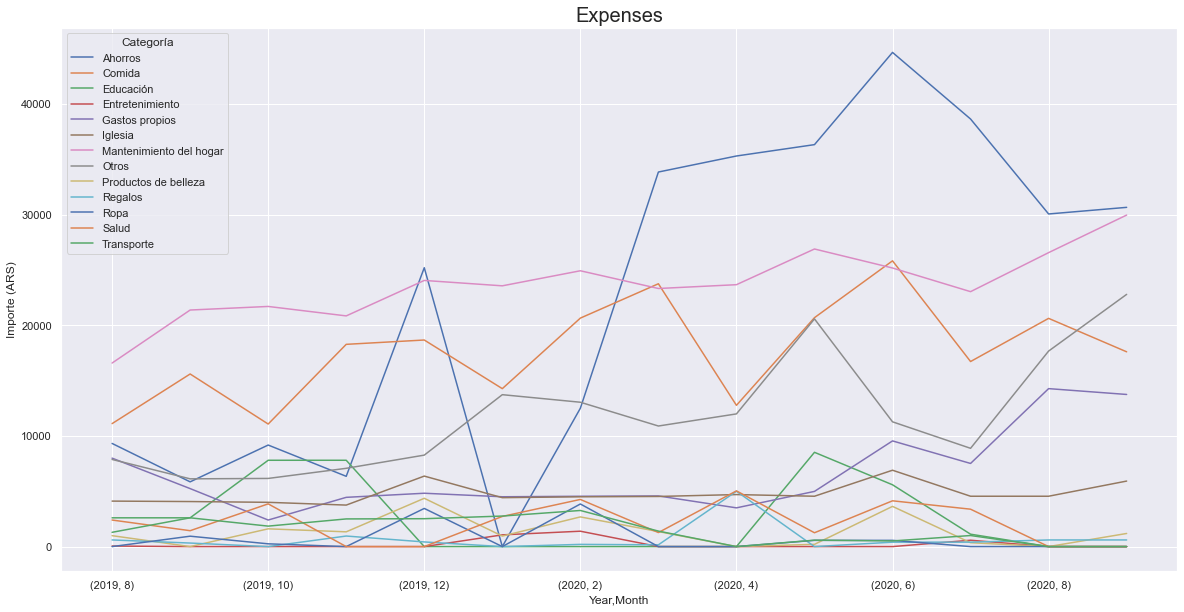

In [41]:
pivot_Expenses['Importe (ARS)'].plot(figsize=(20,10))
plt.ylabel('Importe (ARS)')
plt.title('Expenses', size=20)

#### Here we can see the most important categories are "Ahorros",''Mantenimiento del hogar", "Comida", "Otros", and "Gastos propios", we are going to plot them separately

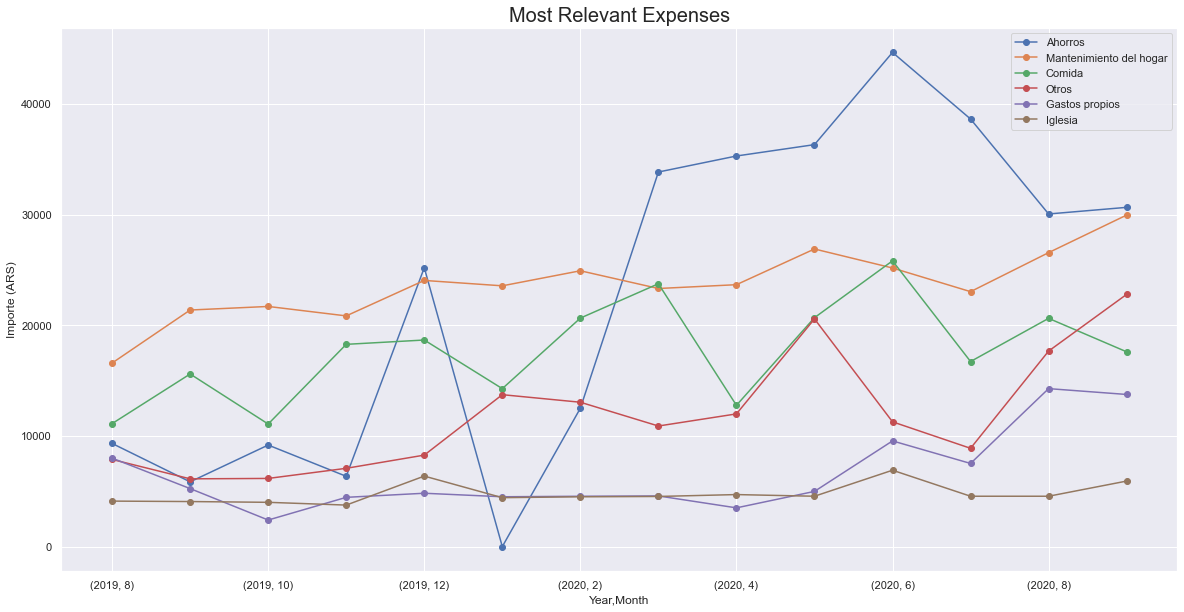

In [42]:
pivot_Expenses["Importe (ARS)","Ahorros"].plot(figsize=(20,10), label = "Ahorros", marker='o')
pivot_Expenses["Importe (ARS)","Mantenimiento del hogar"].plot(label = "Mantenimiento del hogar", marker='o' )
pivot_Expenses["Importe (ARS)","Comida"].plot(label = "Comida", marker='o')
pivot_Expenses["Importe (ARS)","Otros"].plot(label = "Otros", marker='o')
pivot_Expenses["Importe (ARS)","Gastos propios"].plot(label = "Gastos propios", marker='o')
pivot_Expenses["Importe (ARS)","Iglesia"].plot(label = "Iglesia", marker='o')
plt.ylabel('Importe (ARS)')
plt.legend()
plt.title('Most Relevant Expenses', size=20)
plt.show()

####  The graph above shows how the savings increased drastically in the last year, this could be explained by the quarantine since everyone has to be lockdown in their homes, other expenses are being reduced, therefore there is more budget available to save
#### Mantenimiento del Hogar (Home Maintenance) is the higher expense, since Savings can't be considerate as an expense, this category contain things like rent, services like internet, water, electricity, etc. This category has had a soft increase over the time
#### Comida (Food) fluctuate over months, this could be because the food they buy it last more than a month so they don't have to buy the same amount the next period, another reason could be meals away from home

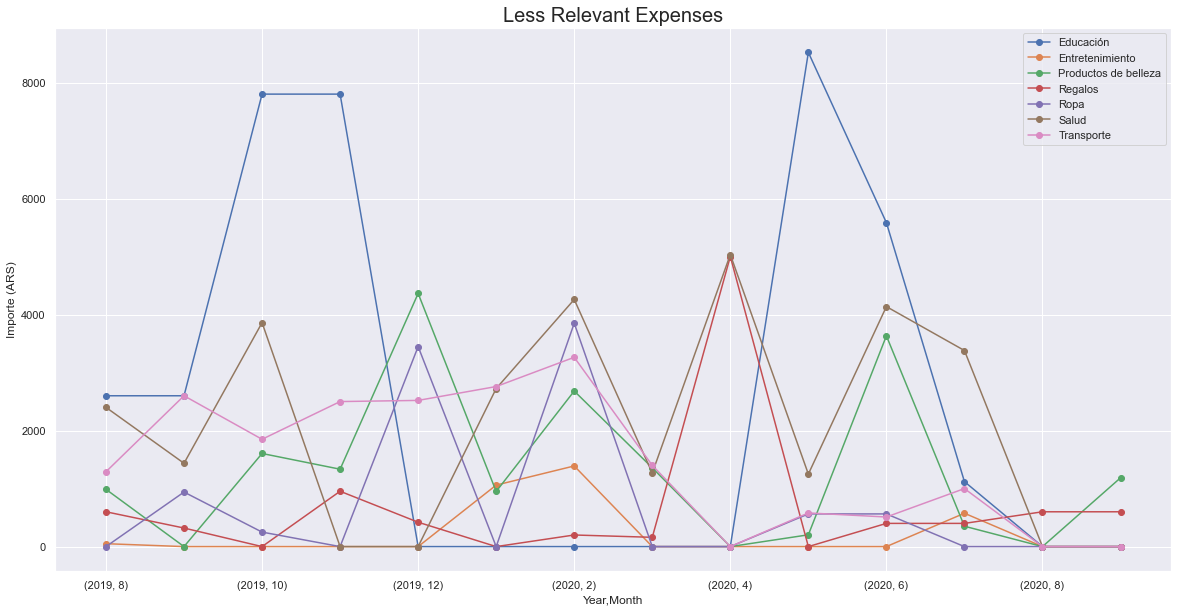

In [43]:
pivot_Expenses["Importe (ARS)","Educación"].plot(figsize=(20,10), label = "Educación", marker='o' )
pivot_Expenses["Importe (ARS)","Entretenimiento"].plot(label = "Entretenimiento", marker='o')
pivot_Expenses["Importe (ARS)","Productos de belleza"].plot(label = "Productos de belleza", marker='o')
pivot_Expenses["Importe (ARS)","Regalos"].plot(label = "Regalos", marker='o')
pivot_Expenses["Importe (ARS)","Ropa"].plot(label = "Ropa", marker='o')
pivot_Expenses["Importe (ARS)","Salud"].plot(label = "Salud", marker='o')
pivot_Expenses["Importe (ARS)","Transporte"].plot(label = "Transporte", marker='o')
plt.ylabel('Importe (ARS)')
plt.legend()
plt.title('Less Relevant Expenses', size=20)
plt.show()

#### These expenses are characterize by being fluctuating over the time

## Analyzing Subcategories

In [44]:
Subcategories = Expenses1.pivot_table(['Importe (ARS)'], index=['Year','Month'], 
                                   columns= ['Categoría','Subcategorías'], aggfunc=sum, fill_value=0)
Subcategories

Importe (ARS)                                             \
Categoría           Ahorros  Comida                                      
Subcategorías       Ahorros Bebidas Chucherías    Comida Comidas fuera   
Year Month                                                               
2019 8               9320.0       0        334  10182.75        595.00   
     9               5850.0       0       1322  11608.95       2665.00   
     10              9175.0       0        565   9863.83        645.00   
     11              6350.0     278       1600  12666.68       3730.00   
     12             25198.0     236       1035  12043.21       5351.00   
2020 1                  0.0     320       2344   8027.40       3580.00   
     2              12500.0     506       1018  11920.38       7200.50   
     3              33844.0    1030          0  18918.33       3800.00   
     4              35292.0       0          0  12764.00          0.00   
     5              36319.0       0        773  16265.88       3645.08   
     6              44652.0       0       1037  21543.00       3240.30   
     7              38633.4       0       1020  14502.26       1199.00   
     8              30054.0       0          0  20622.00          0.00   
     9              30652.0       0        150  16413.83       1035.00   

                                                               ...  \
Categoría     Educación Entretenimiento                        ...   
Subcategorías  Estudios Entretenimiento Eventos Juegos Paseos  ...   
Year Month                                                     ...   
2019 8             2600              50       0      0      0  ...   
     9             2600               0       0      0      0  ...   
     10            7800               0       0      0      0  ...   
     11            7800               0       0      0      0  ...   
     12               0               0       0      0      0  ...   
2020 1                0            1060       0      0      0  ...   
     2                0               0       0    550     70  ...   
     3                0               0       0      0      0  ...   
     4                0               0       0      0      0  ...   
     5             8519               0       0      0      0  ...   
     6             5584               0       0      0      0  ...   
     7             1120               0     575      0      0  ...   
     8                0               0       0      0      0  ...   
     9                0               0       0      0      0  ...   

                                                                           \
Categoría     Productos de belleza Regalos Ropa                     Salud   
Subcategorías Productos cosméticos Regalos Moda     Ropa Zapatos Gimnasio   
Year Month                                                                  
2019 8                           0     600    0     0.00       0        0   
     9                           0     320    0   660.00     280        0   
     10                          0       0    0   250.00       0        0   
     11                          0     954    0     0.00       0        0   
     12                        183     420    0  3448.00       0        0   
2020 1                           0       0    0     0.00       0     1500   
     2                           0     200  630  2620.00     600     1200   
     3                           0     160    0     0.00       0        0   
     4                           0    5000    0     0.00       0        0   
     5                           0       0    0   563.33       0        0   
     6                           0     400    0   563.33       0        0   
     7                           0     400    0     0.00       0        0   
     8                           0     600    0     0.00       0        0   
     9                           0     600    0     0.00       0        0   

                                 

### Comida (Food)

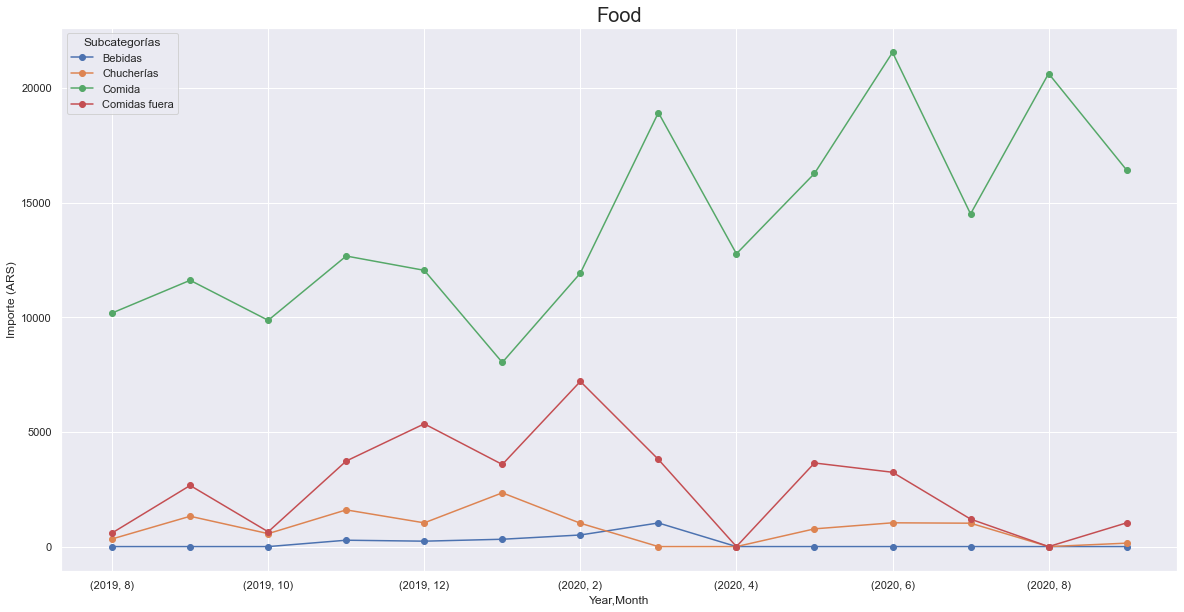

In [45]:
Subcategories['Importe (ARS)', 'Comida'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Food', size=20)
plt.show()

#### Part of the fluctuation of Comida can be explained by Comidas Afuera, this is consistent with what we have said previosly

### Savings vs Income

In [46]:
#Adding year and month to the DataFrame record to create a new pivot table
record1 = record.copy()
record1['Year']= record1['Fecha'].apply(date_to_year)
record1['Month']= record1['Fecha'].apply(date_to_month)

In [47]:
#Creating a new pivot table with expenses and income together
Categories = record1.pivot_table(['Importe (ARS)'], index=['Year','Month'], 
                                   columns= ['Categoría',], aggfunc=sum, fill_value=0)
Categories

Importe (ARS)                                                   \
Categoría        Ahorros    Comida Dinero extra Educación Entretenimiento   
Year Month                                                                  
2019 8            9320.0  11111.75        10600      2600              50   
     9            5850.0  15595.95         2000      2600               0   
     10           9175.0  11073.83         5000      7800               0   
     11           6350.0  18274.68        11350      7800               0   
     12          25198.0  18665.21        21006         0               0   
2020 1               0.0  14271.40         3200         0            1060   
     2           12500.0  20644.88        24183         0            1390   
     3           33844.0  23748.33         9061         0               0   
     4           35292.0  12764.00        37600         0               0   
     5           36319.0  20683.96            0      8519               0   
     6           44652.0  25820.30        23409      5584               0   
     7           38633.4  16721.26         2330      1120             575   
     8           30054.0  20622.00            0         0               0   
     9           30652.0  17598.83         1630         0               0   

                                                                               \
Categoría  Gastos propios Iglesia Mantenimiento del hogar     Otros      Plus   
Year Month                                                                      
2019 8            7992.00    4110                16585.00   7874.08      0.00   
     9            5240.00    4070                21375.00   6121.75    678.00   
     10           2400.00    4000                21698.04   6175.25      0.00   
     11           4450.00    3750                20844.00   7242.83      0.00   
     12           4820.00    6370                24048.00   8265.22  13000.00   
2020 1            4502.00    4420                23561.78  14919.79      0.00   
     2            4548.00    4500                24922.00  13043.36      0.00   
     3            4577.00    4530                23320.00  10895.03      0.00   
     4            3500.00    4700                23664.19  11989.35      0.00   
     5            4986.88    4550                26889.94  37953.46      0.00   
     6            9549.00    6900                25172.07  39078.60      0.00   
     7            7512.00    4550                23035.00  17342.00      0.00   
     8           14273.00    4550                26560.70  20809.40   6524.33   
     9           13746.00    5920                29955.23  22790.03      0.00   

                                                                                
Categoría  Productos de belleza Regalos     Ropa    Salario   Salud Transporte  
Year Month                                                                      
2019 8                   987.00     600     0.00   25419.00  2400.0       1290  
     9                     0.00     320   940.00   64863.00  1436.2       2600  
     10                 1605.00       0   250.00   64863.00  3860.0       1850  
     11                 1334.00     954     0.00   62896.00     0.0       2500  
     12                 4364.00     420  3448.00   67528.62     0.0       2520  
2020 1                   950.00       0     0.00   66607.00  2725.0       2759  
     2                  2681.70     200  3850.00   71587.00  4260.0       3263  
     3                  1358.00     160     0.00   99783.00  1268.0       1400  
     4                     0.00    5000     0.00   92548.00  5034.0          0  
     5                   203.00       0   563.33   99407.00  1250.0        580  
     6                  3633.00     400   563.33   99783.00  4137.0        510  
     7                   351.00     400     0.00   99258.00  3380.0       1000  
     8                     0.00     600     0.00  105964.00     0.0          0  
     9                  118

In [48]:
#Extracting only Income and Saving to make the comparison
#We add Otros because this Contains the subcategory TDC (Credit Card), it seems to be logical that the higher the payments 
#for the TDC The lower the capacity of saving
SvI = Categories['Importe (ARS)'][['Salario','Dinero extra', 'Plus', 'Ahorros', 'Otros']]
SvI

Categoría     Salario  Dinero extra      Plus  Ahorros     Otros
Year Month                                                      
2019 8       25419.00         10600      0.00   9320.0   7874.08
     9       64863.00          2000    678.00   5850.0   6121.75
     10      64863.00          5000      0.00   9175.0   6175.25
     11      62896.00         11350      0.00   6350.0   7242.83
     12      67528.62         21006  13000.00  25198.0   8265.22
2020 1       66607.00          3200      0.00      0.0  14919.79
     2       71587.00         24183      0.00  12500.0  13043.36
     3       99783.00          9061      0.00  33844.0  10895.03
     4       92548.00         37600      0.00  35292.0  11989.35
     5       99407.00             0      0.00  36319.0  37953.46
     6       99783.00         23409      0.00  44652.0  39078.60
     7       99258.00          2330      0.00  38633.4  17342.00
     8      105964.00             0   6524.33  30054.0  20809.40
     9      122401.00          1630      0.00  30652.0  22790.03

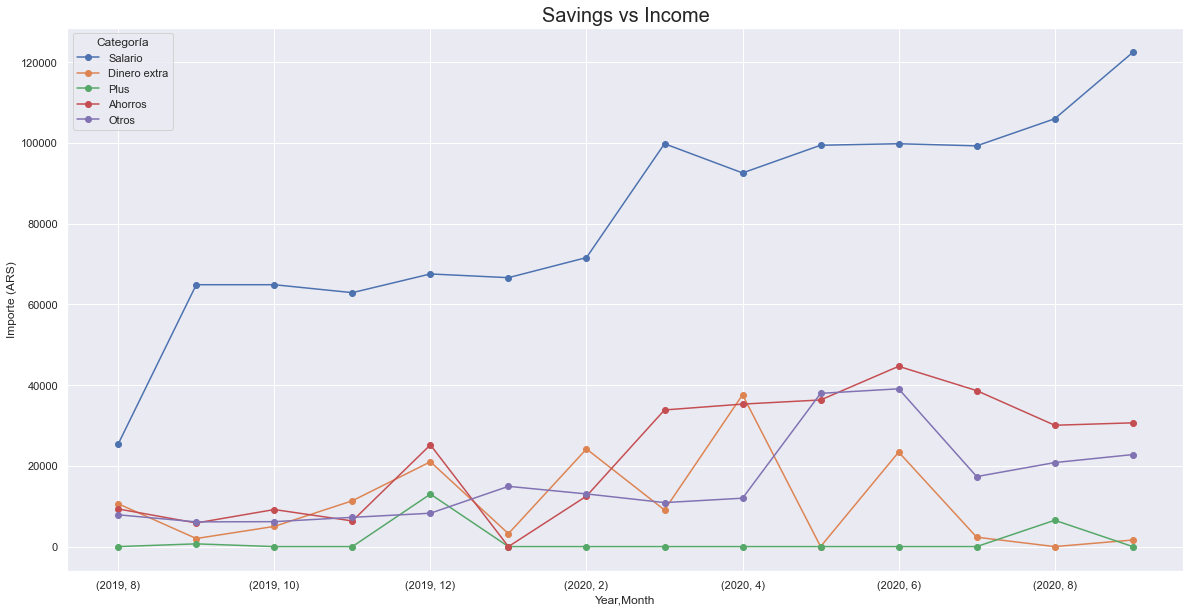

In [49]:
SvI.plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Savings vs Income', size=20)
plt.show()

In [50]:
SvI.corr()

Categoría,Salario,Dinero extra,Plus,Ahorros,Otros
Categoría,,,,,
Salario,1.000000,-0.107796,-0.029335,0.769650,0.617071
Dinero extra,-0.107796,1.000000,0.099806,0.199363,-0.086052
Plus,-0.029335,0.099806,1.000000,0.095370,-0.144597
Ahorros,0.769650,0.199363,0.095370,1.000000,0.666195
Otros,0.617071,-0.086052,-0.144597,0.666195,1.000000


#### The theory seems to match with reality, the level of income and the level of debt in the TDC (Credit Card) are highly correlated with the capacity of saving for these subjects

### Mantenimiento del Hogar (Home Maintenance)

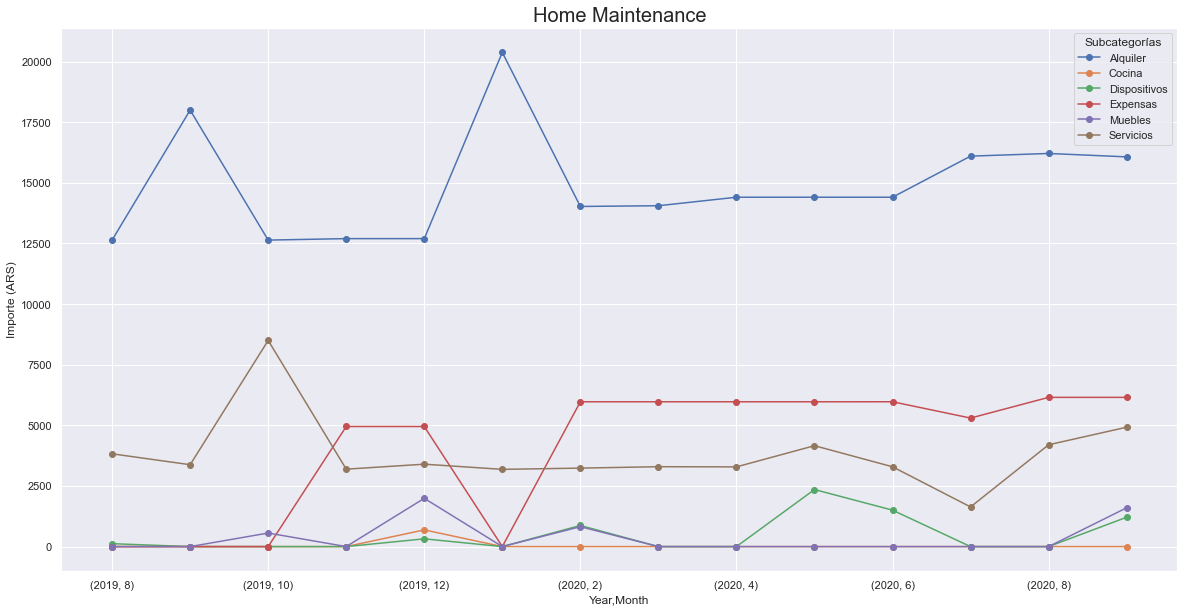

In [51]:
Subcategories['Importe (ARS)', 'Mantenimiento del hogar'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Home Maintenance', size=20)
plt.show()

### Otros (Others)

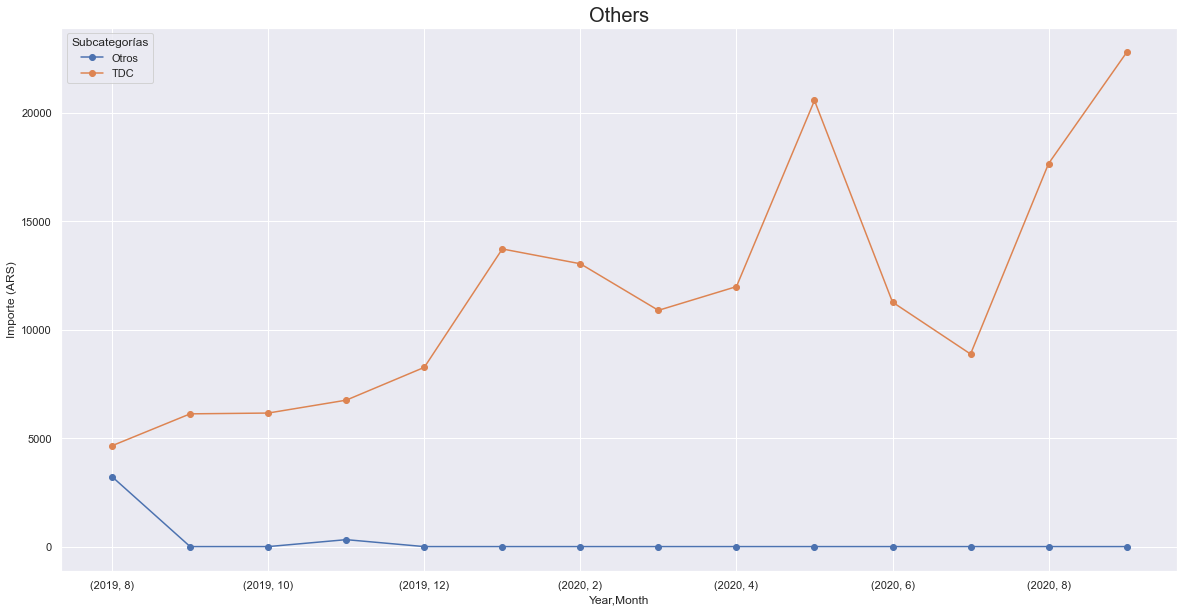

In [52]:
Subcategories['Importe (ARS)', 'Otros'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Others', size=20)
plt.show()

#### This category is almost entirely composed of credit card payments

### Gastos Propios (Personal Expenses)

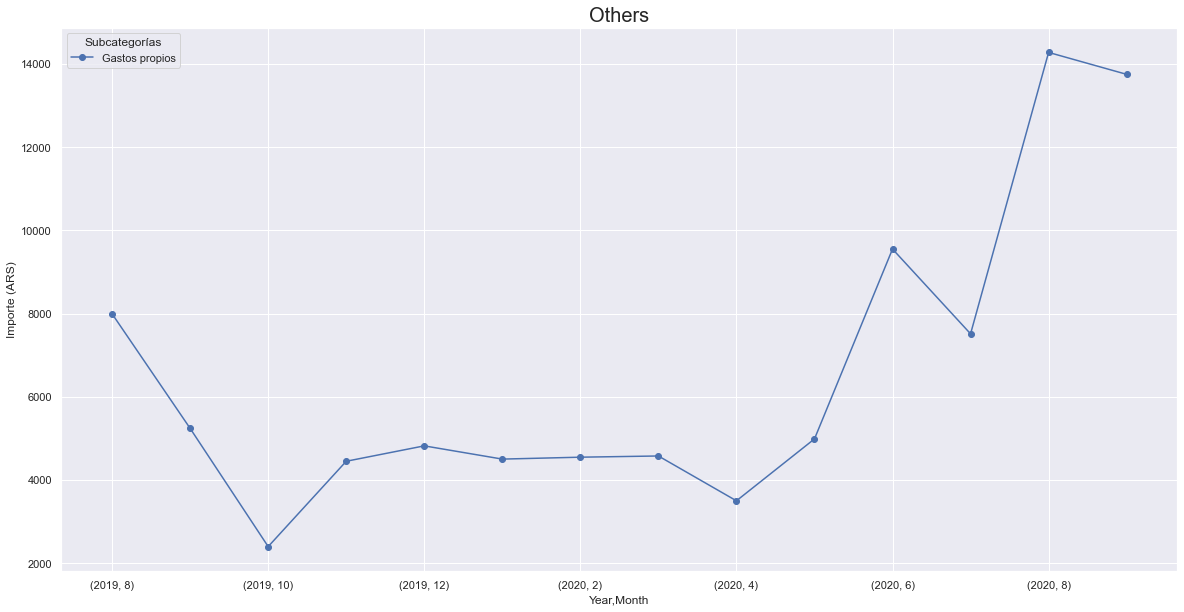

In [53]:
Subcategories['Importe (ARS)', 'Gastos propios'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Others', size=20)
plt.show()

### Transportation

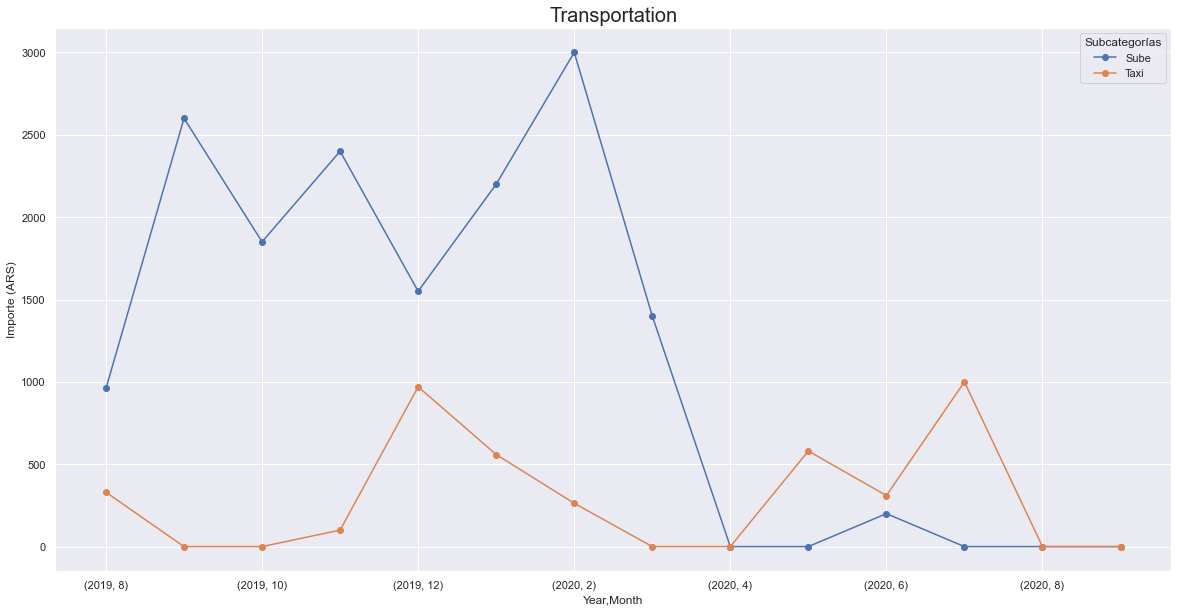

In [54]:
Subcategories['Importe (ARS)', 'Transporte'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Transportation', size=20)
plt.show()

#### Here we can see that public transportation went to zero when quarantine was established

## Expenses by Subject

In [55]:
EbS = Expenses1.pivot_table(['Importe (ARS)'], index=['Year','Month'], 
                                   columns= ['Categoría', 'Subcategorías', 'Name'], aggfunc=sum, fill_value=0)
EbS

Importe (ARS)                                              \
Categoría           Ahorros           Comida                              
Subcategorías       Ahorros          Bebidas Chucherías          Comida   
Name                   Juan    Maria    Juan       Juan Maria      Juan   
Year Month                                                                
2019 8                 4660   4660.0       0        334     0   8702.75   
     9                 2950   2900.0       0       1322     0  10108.95   
     10                9175      0.0       0        565     0   7706.83   
     11                6350      0.0     278       1415   185   5913.68   
     12               12600  12598.0     236       1035     0   9083.21   
2020 1                    0      0.0     320       2344     0   4913.40   
     2                    0  12500.0     506       1018     0   5316.38   
     3                25350   8494.0    1030          0     0   9397.33   
     4                    0  35292.0       0          0     0      0.00   
     5                18070  18249.0       0        773     0   8062.88   
     6                25805  18847.0       0          0  1037   7384.00   
     7                19240  19393.4       0          0  1020   1315.00   
     8                20020  10034.0       0          0     0   6895.00   
     9                20410  10242.0       0          0   150   2388.30   

                                                       ...                   \
Categoría                                   Educación  ...    Ropa    Salud   
Subcategorías           Comidas fuera        Estudios  ... Zapatos Gimnasio   
Name              Maria          Juan Maria      Juan  ...   Maria     Juan   
Year Month                                             ...                    
2019 8          1480.00        420.00   175         0  ...       0        0   
     9          1500.00       2215.00   450         0  ...       0        0   
     10         2157.00        545.00   100      5200  ...       0        0   
     11         6753.00       3550.00   180      5200  ...       0        0   
     12         2960.00       2380.00  2971         0  ...       0        0   
2020 1          3114.00       3470.00   110         0  ...       0     1500   
     2          6604.00       2406.50  4794         0  ...     600     1200   
     3          9521.00       3350.00   450         0  ...       0        0   
     4         12764.00          0.00     0         0  ...       0        0   
     5          8203.00       3645.08     0      8519  ...       0        0   
     6         14159.00       2325.30   915      5584  ...       0        0   
     7         13187.26       1199.00     0      1120  ...       0        0   
     8         13727.00          0.00     0         0  ...       0        0   
     9         14025.53          0.00  1035         0  ...       0        0   

                                                                      
Categoría                                Transporte                   
Subcategorías Medicina       Salud             Sube       Taxi        
Name              Juan Maria  Juan Maria       Juan Maria Juan Maria  
Year Month                                                            
2019 8             0.0  2400     0     0        650   310  330     0  
     9          1436.2     0     0     0       2100   500    0     0  
     10         1400.0  1360  1100     0       1100   750    0     0  
     11            0.0     0     0     0       1200  1200  100     0  
     12            0.0     0     0     0        450  1100  250   720  
2020 1             0.0  1225     0     0       1000  1200  559     0  
     2          3060.0     0     0     0       1300  1700  263     0  
     3             0.0  1268     0     0        700   700    0     0  
     4          3380.0     0     0  1654          0     0    0     0  
     5             0.0  1250     0     0          0     0    0   580  
     6          1585.

### Transportation

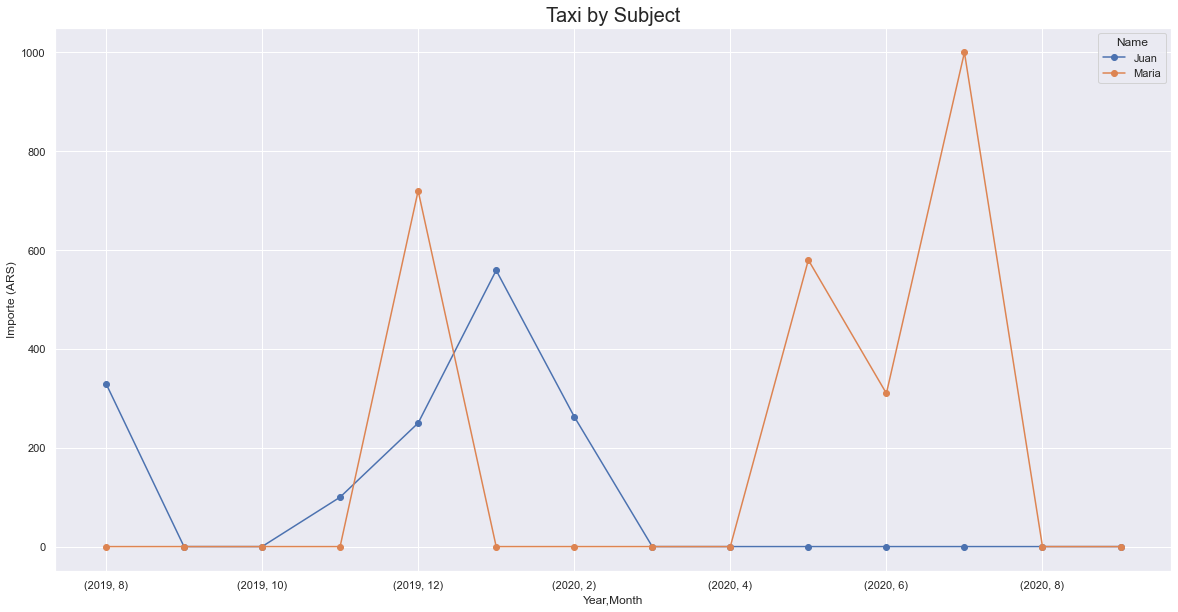

In [56]:
EbS['Importe (ARS)', 'Transporte','Taxi'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Taxi by Subject', size=20)
plt.show()

### Food

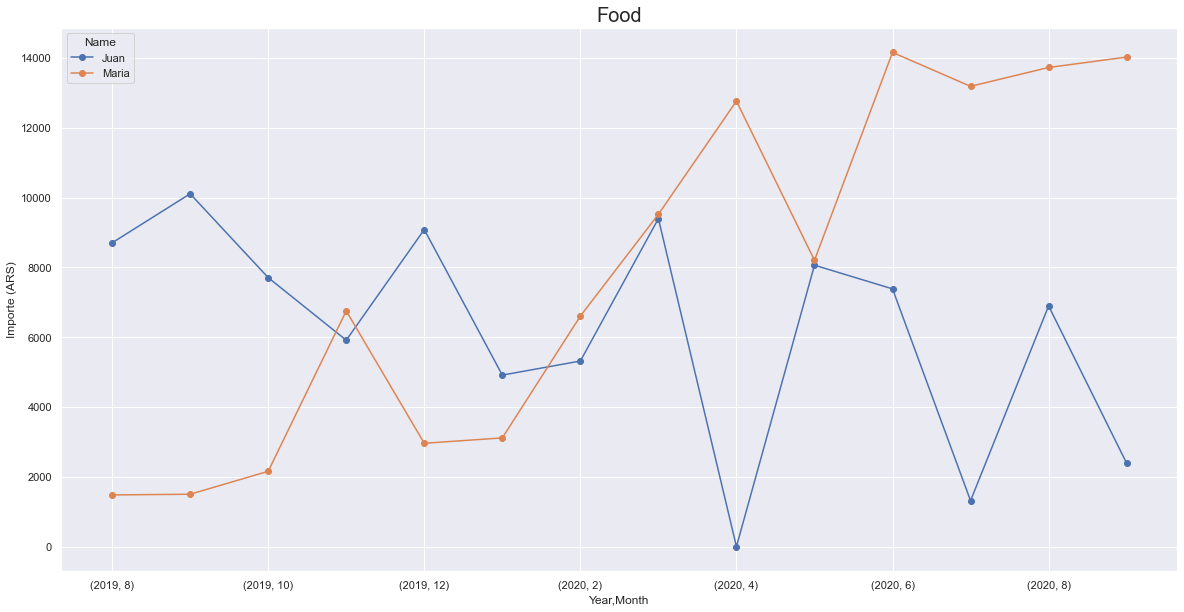

In [57]:
EbS['Importe (ARS)', 'Comida','Comida'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Food', size=20)
plt.show()

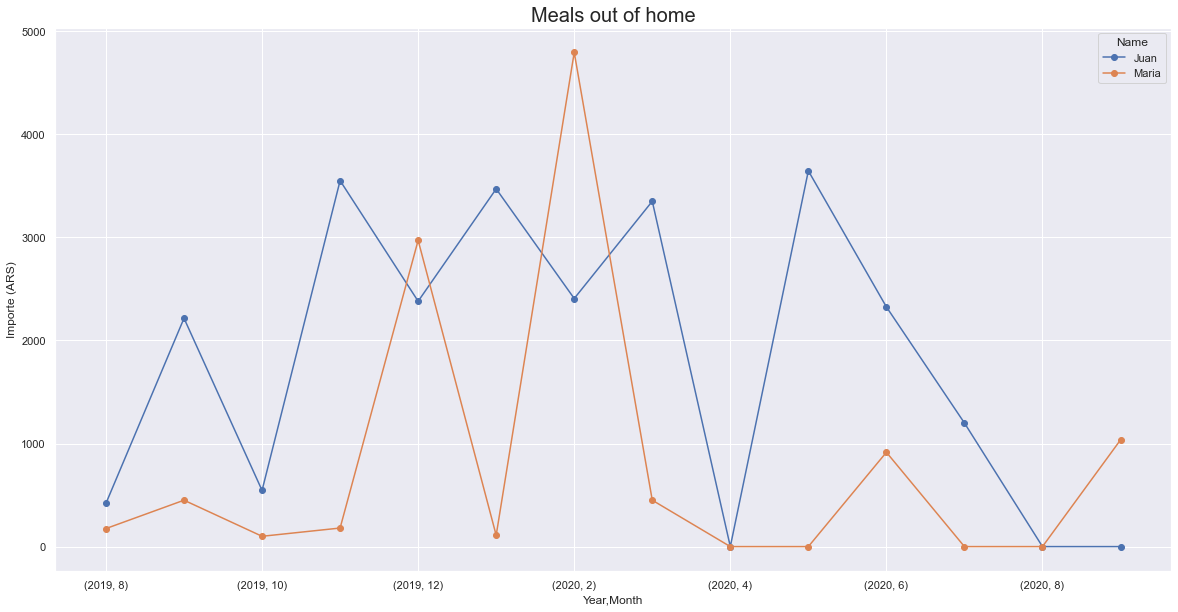

In [58]:
EbS['Importe (ARS)', 'Comida','Comidas fuera'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Meals out of home', size=20)
plt.show()

### Savings

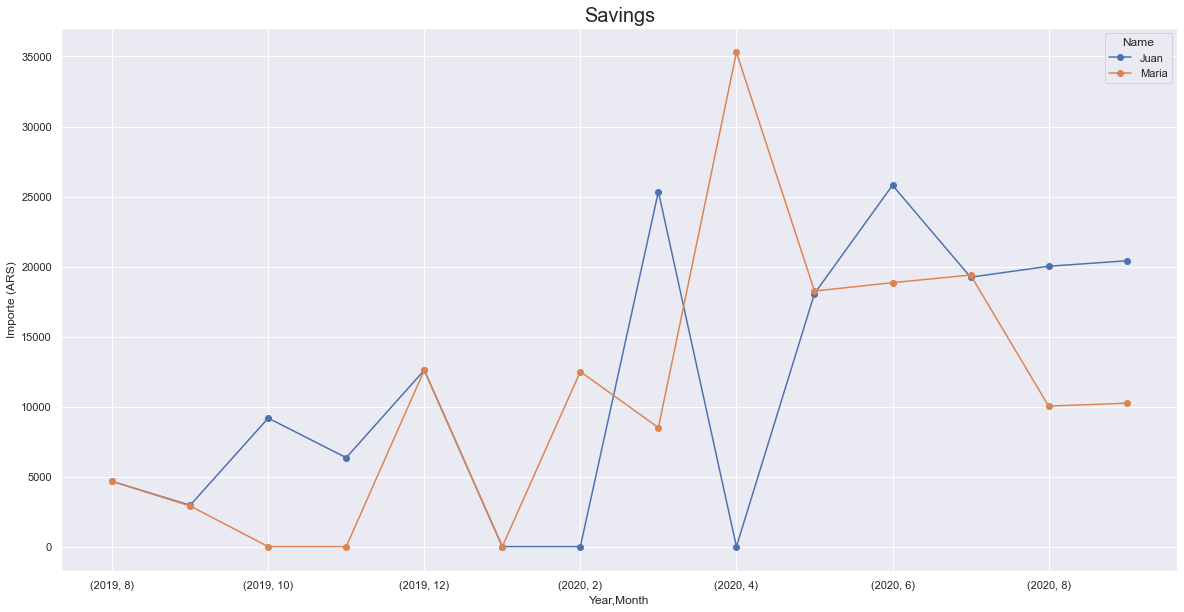

In [59]:
EbS['Importe (ARS)', 'Ahorros','Ahorros'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Savings', size=20)
plt.show()

### Home Maintenance

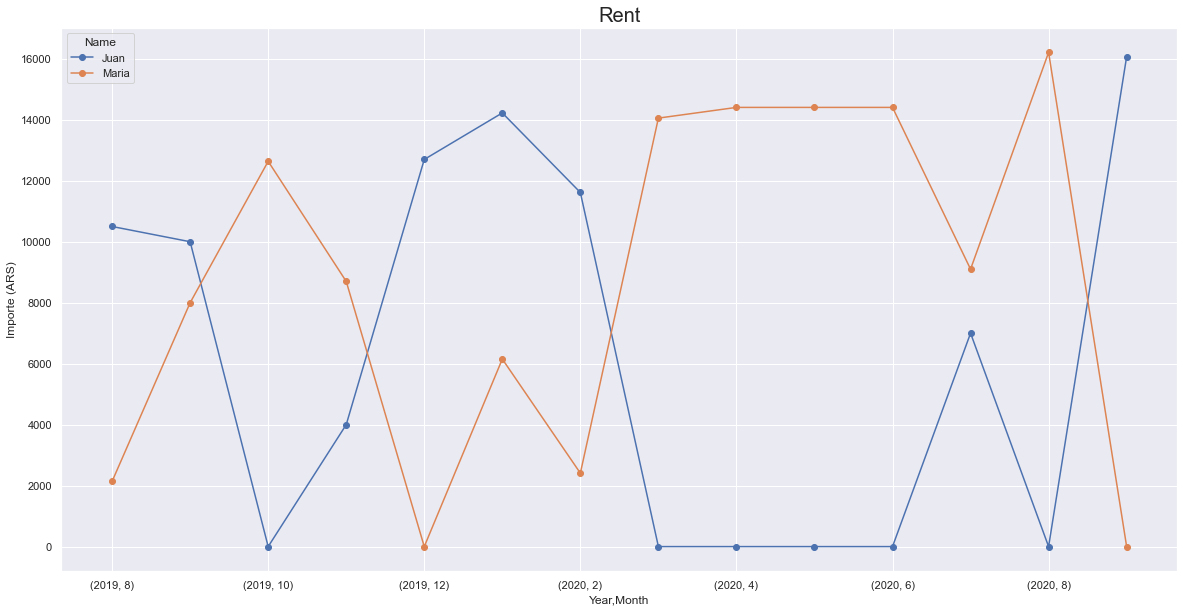

In [60]:
EbS['Importe (ARS)', 'Mantenimiento del hogar','Alquiler'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Rent', size=20)
plt.show()

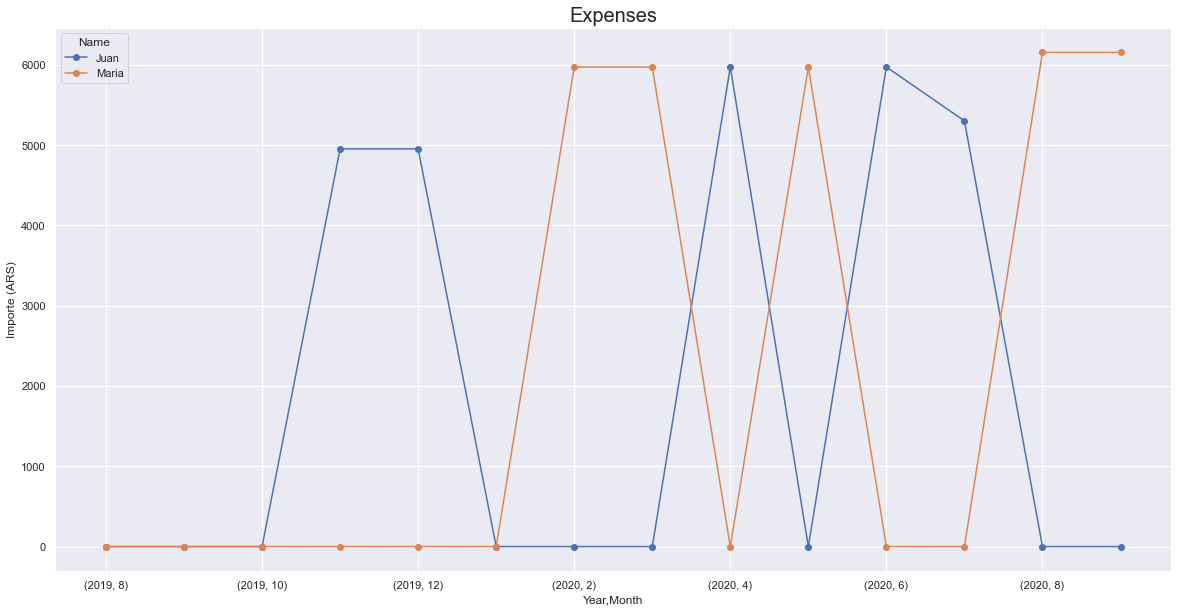

In [61]:
EbS['Importe (ARS)', 'Mantenimiento del hogar','Expensas'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Expenses', size=20)
plt.show()

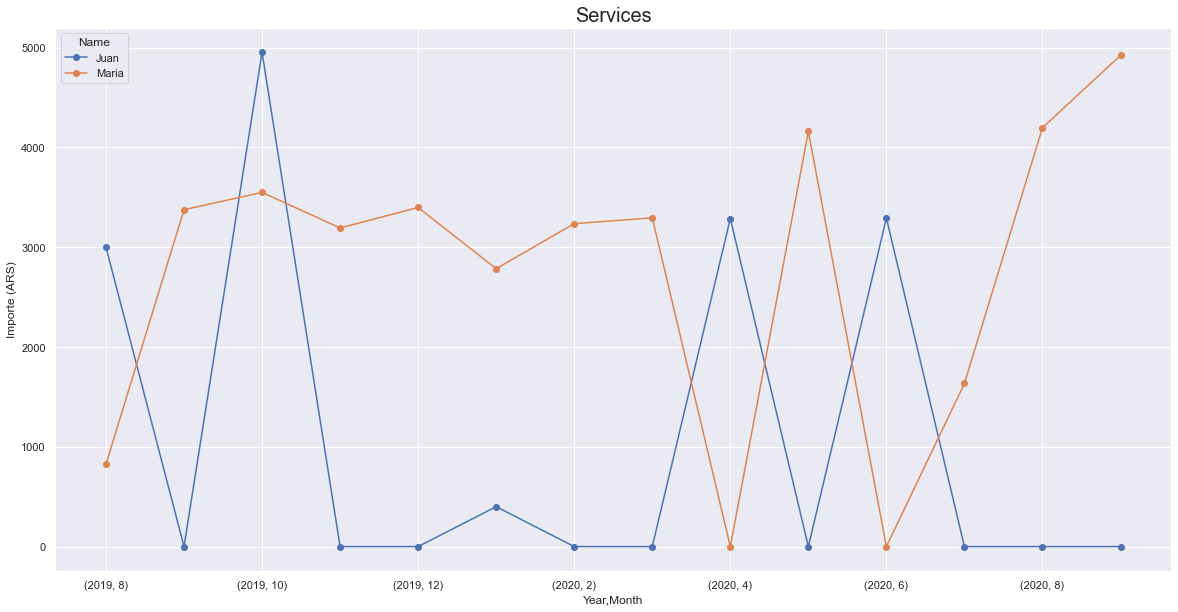

In [62]:
EbS['Importe (ARS)', 'Mantenimiento del hogar','Servicios'].plot(figsize=(20,10), marker = 'o')
plt.ylabel('Importe (ARS)')
plt.title('Services', size=20)
plt.show()

#### All the expenses in Home Maintenance are usually paid entirely by one subject instead of being divided half and a half

### Hierarchy

In [104]:
total_expenses = Expenses1[['Categoría', 'Importe (ARS)']].groupby(Expenses1['Categoría']).sum()
total_expenses = total_expenses.sort_values(['Importe (ARS)'],ascending=False, axis=0)
total_expenses

,Importe (ARS)
Categoría,
Mantenimiento del hogar,331630.95
Ahorros,317839.40
Comida,247596.38
Otros,166327.16
Gastos propios,92095.88
Iglesia,66920.00
Educación,36023.00
Salud,29750.20
Transporte,20272.00


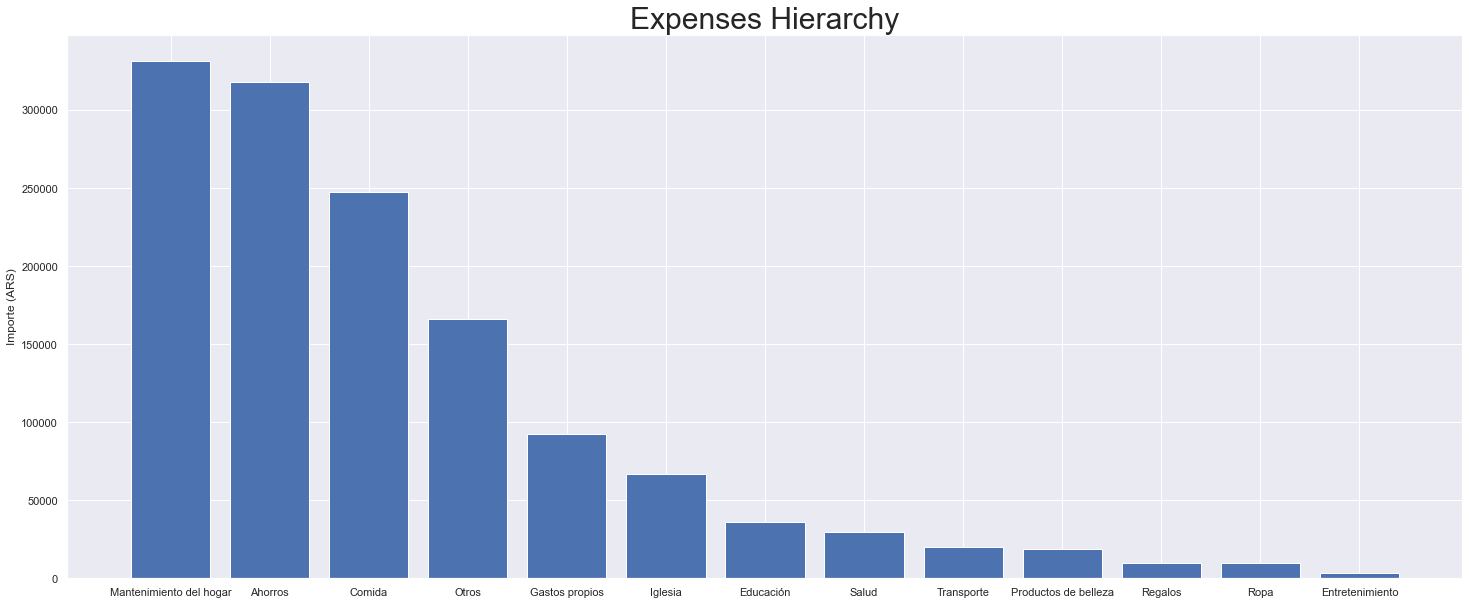

In [119]:
fig, ax = plt.subplots()
ax.bar(total_expenses.index, total_expenses['Importe (ARS)'])
fig.set_size_inches([25,10])
plt.ylabel('Importe (ARS)')
plt.title('Expenses Hierarchy', size=30)
plt.show()

#### This gives us a better view of the hierarchy of the expenses from the most relevant to the least. This couple assigns a big part  of their budget to Home Maintenance and Savings and very low of their budget to clothes and entertainment

In [121]:
round(total_expenses/total_expenses.sum()*100,2)

,Importe (ARS)
Categoría,
Mantenimiento del hogar,24.58
Ahorros,23.55
Comida,18.35
Otros,12.33
Gastos propios,6.82
Iglesia,4.96
Educación,2.67
Salud,2.20
Transporte,1.50


#### To have a better view, this table shows the percentage of the budget spent on each category